# Arcsin transformation

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# dataset for the demo
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# with open-source packages
from sklearn.preprocessing import FunctionTransformer

In [2]:
#Load dataset
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
variables = [
  'mean compactness',
  'mean concavity',
  'mean concave points',
  'mean fractal dimension',
  'smoothness error',
  'compactness error',
  'concavity error',
  'concave points error',
  'symmetry error',
  'fractal dimension error',
  'worst symmetry',
  'worst fractal dimension']

In [5]:
# make a copy of the data

train_t = X_train.copy()
test_t = X_test.copy()

In [6]:
# set up transformer with desired operations

tf = FunctionTransformer(func=lambda x: np.arcsin(np.sqrt(x)))

tf.set_output(transform="pandas")

C:\Users\mainn.ho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


FunctionTransformer(func=<function <lambda> at 0x00000287C10FD080>)

In [7]:
# transform the data
train_t[variables] = tf.transform(X_train[variables])
test_t[variables] = tf.transform(X_test[variables])

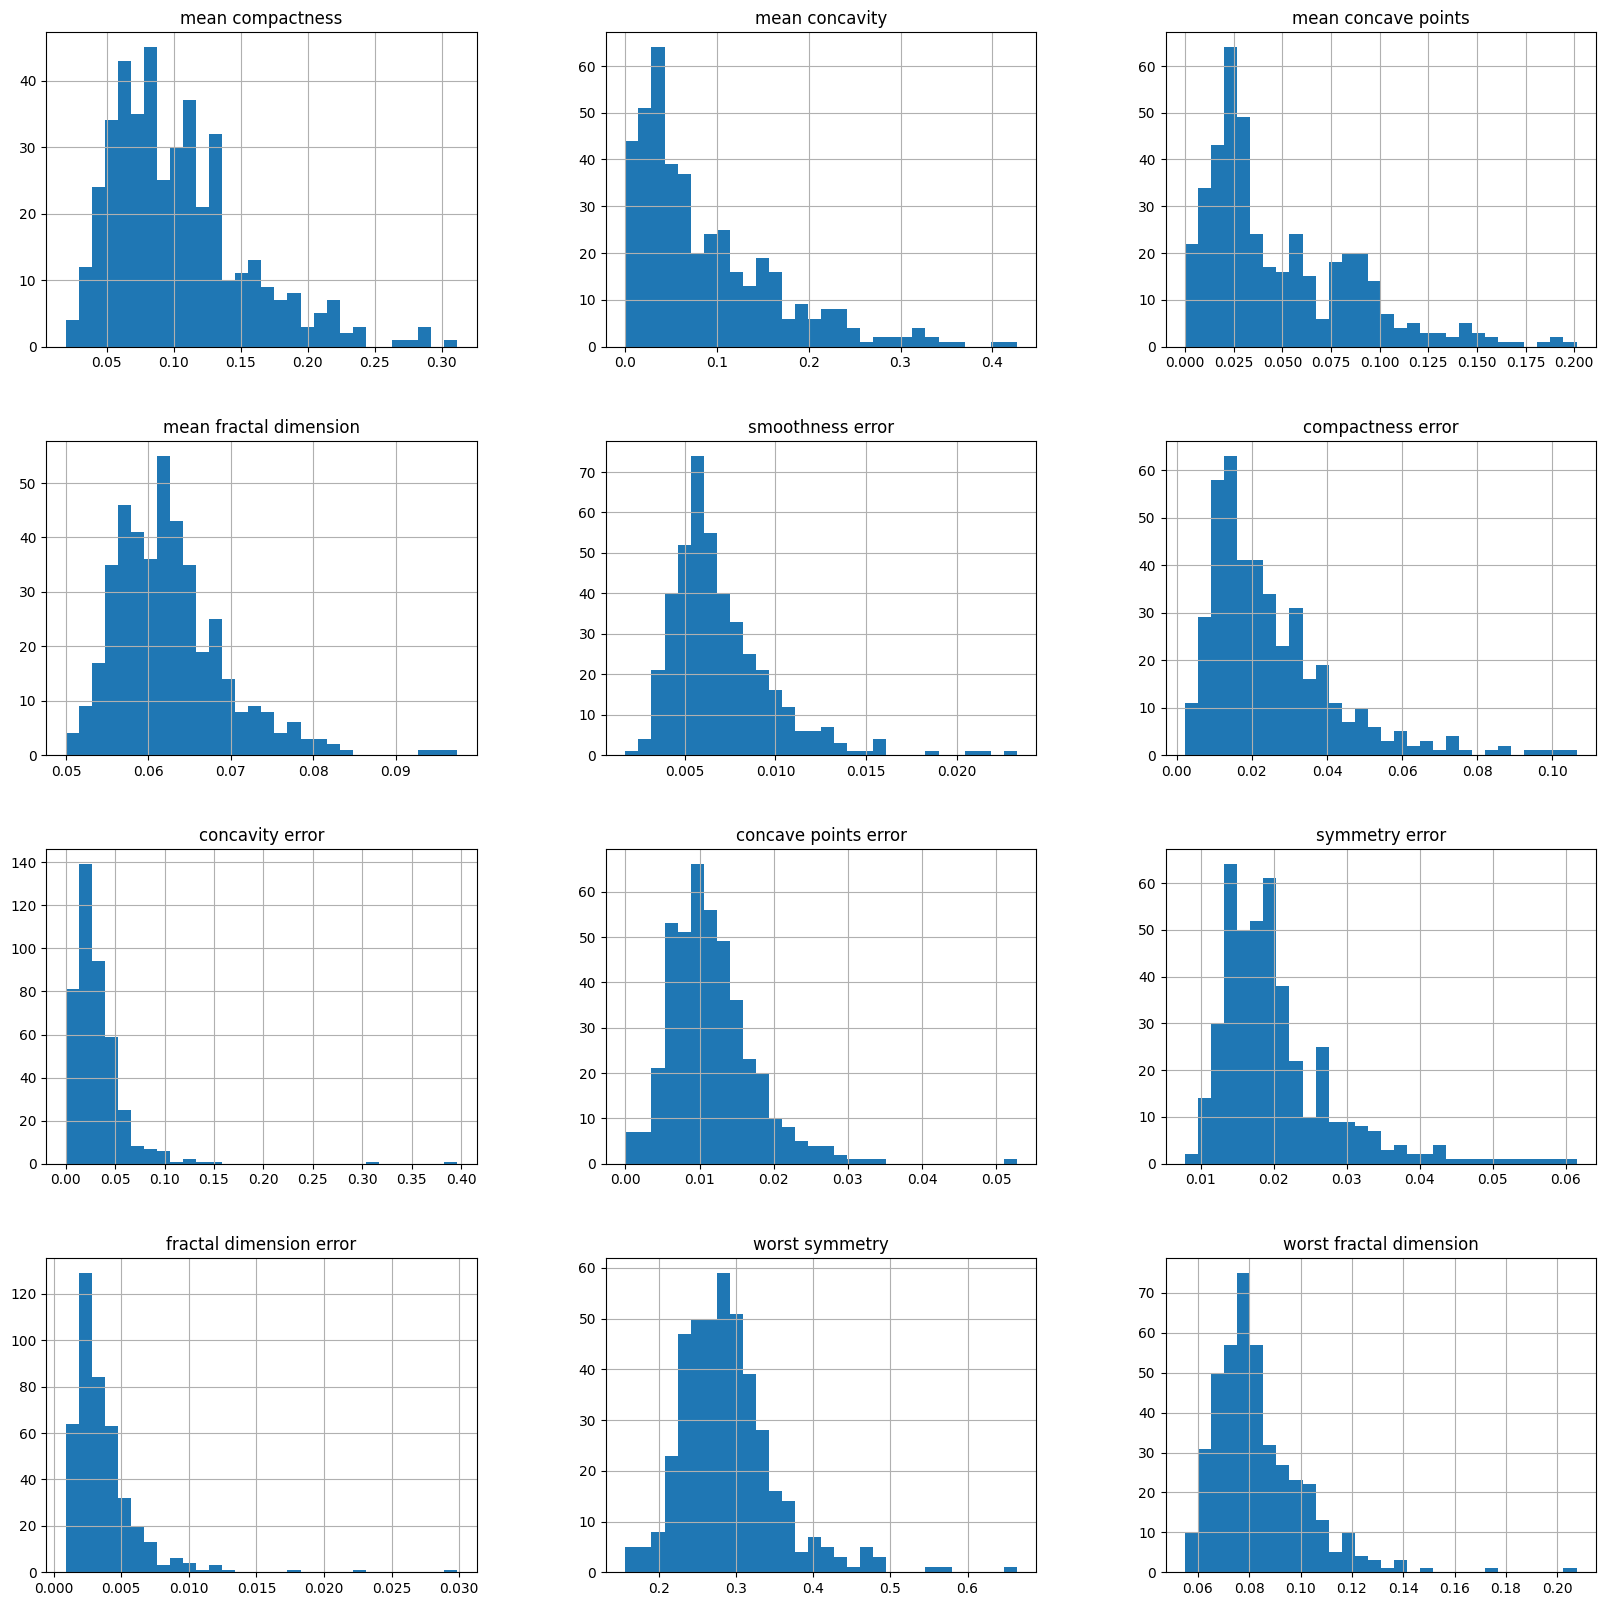

In [8]:
# original variables
X_train[variables].hist(figsize=(20,20), bins=30)
plt.show()

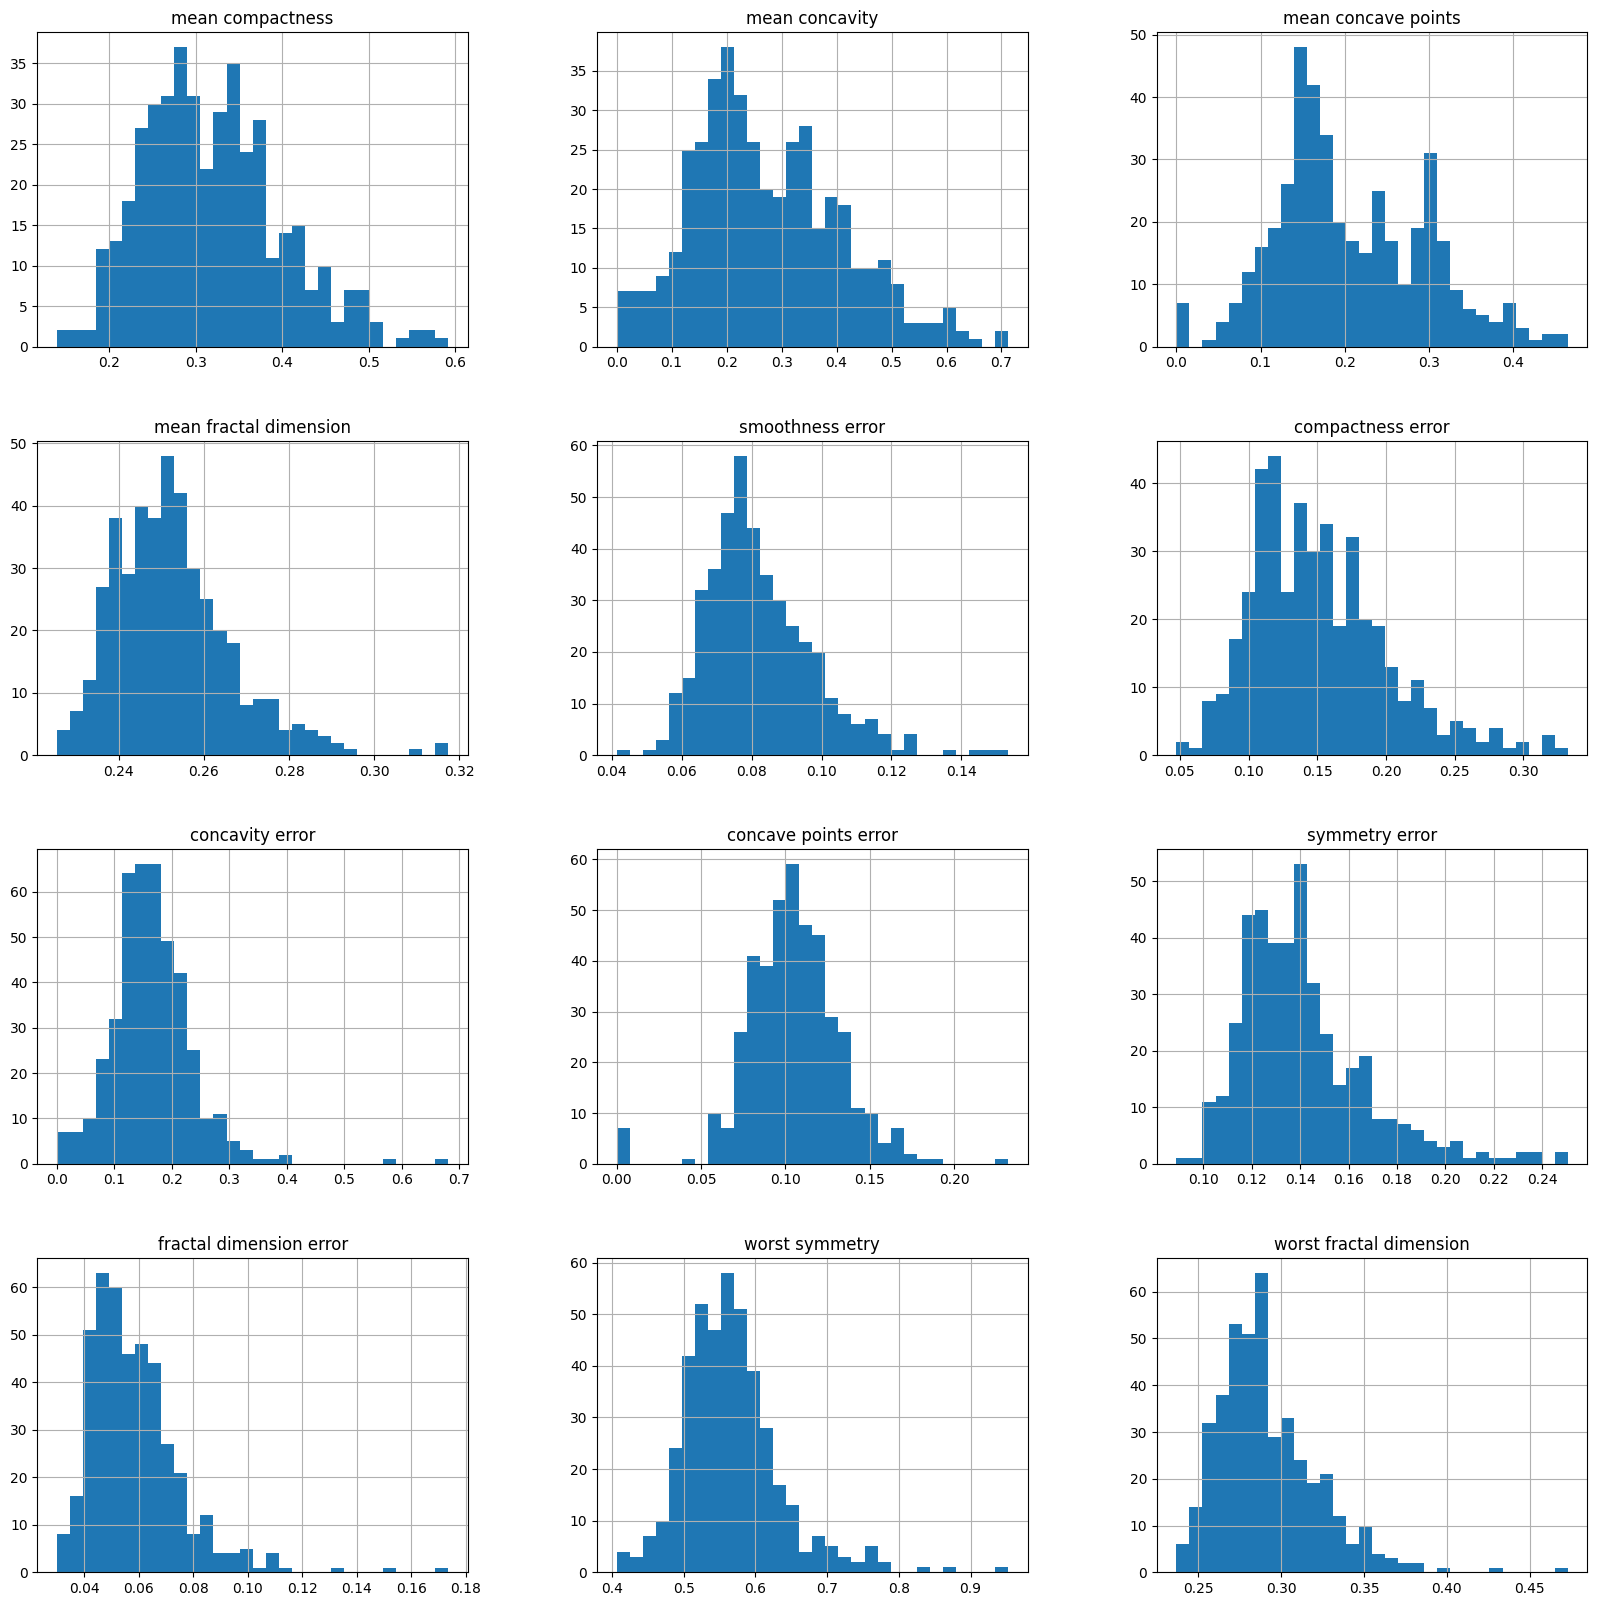

In [9]:
# transformed variable
train_t[variables].hist(figsize=(20,20), bins=30)
plt.show()